# The forecaster's Toolbox

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

plt.style.use("ggplot")

In [141]:
data =  pd.read_csv("kaggle_data\DailyDelhiClimateTrain.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Benchmark forecasts

Some benchmark forecasts which can be created are:
1. The average method
2. Naive method
3. Seasonal Naive method
4. Drift method

### The average forecast

Text(0.5, 1.0, 'Average Forecast for mean temperature')

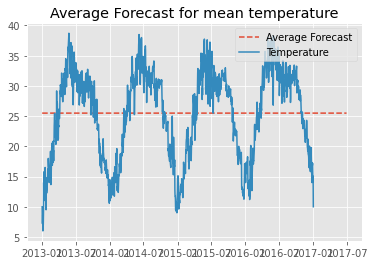

In [144]:
empty_df = pd.DataFrame({'date': pd.date_range(start=data.date.iloc[-1], periods=180, freq='D', closed='right')})

avg_data = data.append(empty_df)

avg_data["average"] = avg_data.meantemp.dropna().mean()

plt.plot(avg_data["date"], avg_data["average"],'--' , label = "Average Forecast")
plt.plot(avg_data["date"], avg_data["meantemp"], label = "Temperature")
plt.legend(loc = "upper right")
plt.title("Average Forecast for mean temperature")

The Naive method

Text(0.5, 1.0, 'Naive Forecast for mean temperature')

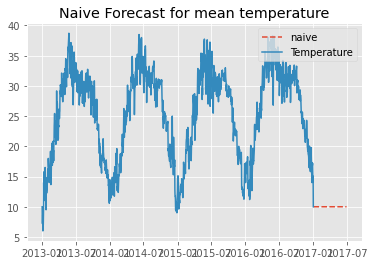

In [149]:
empty_df = pd.DataFrame({'date': pd.date_range(start=data.date.iloc[-1], periods=180, freq='D', closed='right'),"naive":data.iloc[-1,1]})

naive_data = data.append(empty_df)

plt.plot(naive_data["date"], naive_data["naive"],'--' , label = "naive")
plt.plot(naive_data["date"], naive_data["meantemp"], label = "Temperature")
plt.legend(loc = "upper right")
plt.title("Naive Forecast for mean temperature")

Similar Results would follow for the other types of forecasts being generated

## Residual Diagnostics

Another quantity of interest would be the residuals - difference between the predicted and observed values of the time series in the "test" set.  
Three plots used to visualise this include:
* Residual plot over time
* ACF plot 
* Distribution of residuals

IN addition to this, we can perform the Ljung-Box test to conclude if the residuals are auto-correlated.

For the rest of these exercises, we will asume that we are performing a naive forecast of the data.
